# Example code to apply the modular splicing model

## Splicing delta PSI prediction

Example test variants come from ClinVar BRCA1 variants

In [1]:
from mmsplice.vcf_dataloader import SplicingVCFDataloader
from mmsplice import MMSplice, predict_all_table, predict_save
from mmsplice.utils import max_varEff

Using TensorFlow backend.


In [2]:
gtf = '../tests/data/test.gtf'
vcf = '../tests/data/test.vcf.gz'
fasta = '../tests/data/hg19.nochr.chr17.fa'

In [3]:
dl = SplicingVCFDataloader(gtf, fasta, vcf, encode=False, split_seq=True)

In [4]:
next(dl)

{'inputs': {'seq': {'acceptor_intron': 'CCTAAGAACTCATACAACCAGGACCCTGGAGTCGATTGATTAGAGCCTAGTCCAGGAGAATGAATTGACACTAATCTCTGCTTGTGTTCTCTGT',
   'acceptor': 'TCCAGGAGAATGAATTGACACTAATCTCTGCTTGTGTTCTCTGTCTCCAGCAA',
   'exon': 'CAATTGGGCAGATGTGTGAGGCACCTGTGGTGACCCGAGAGTGGGTGTTGGACAGTGTAGCACTCTACCAGTGCCAGGAGCTGGACACCTACCTGATACCCCAGATCCCCCACAGCCACTACTGACTGCAGCCAGCCACAGGTACAGAGCCACAGGACCCCAAGAATGAGCTTACAAAGTGGCCTTTCCAGGCCCTGGGAGCTCCTCTCACTCTTCAGTCCTTCTACTGTCCTGGCTACTAAATATTTTATGTACATCAGCCTGAAAAGGACTTCTGGCTATGCAAGGGTCCCTTAAAGATTTTCTGCTTGAAGTCTCCCTTGGAAATCTGCCATGAGCACAAAATTATGGTAATTTTTCACCTGAGAAGATTTTAAAACCATTTAAACGCCACCAATTGAGCAAGATGCTGATTCATTATTTATCAGCCCTATTCTTTCTATTCAGGCTGTTGTTGGCTTAGGGCTGGAAGCACAGAGTGGCTTGGCCTCAAGAGAATAGCTGGTTTCCCTAAGTTTACTTCTCTAAAACCCTGTGTTCACAAAGGCAGAGAGTCAGACCCTTCAATGGAAGGAGAGTGCTTGGGATCGATTATGTGACTTAAAGTCAGAATAGTCCTTGGGCAGTTCTCAAATGTTGGAGTGGAACATTGGGGAGGAAATTCTGAGGCAGGTATTAGAAATGAAAAGGAAACTTGAAACCTGGGCATGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTGGGCAGATCACTGGAGGTCAGGAGTTC

In [5]:
model = MMSplice()

Instructions for updating:
Colocations handled automatically by placer.


2019-08-13 18:03:12,323 [WARNING] From /home/muhammedhasan/Projects/MMSplice/venv/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2019-08-13 18:03:12,590 [WARNING] From /home/muhammedhasan/Projects/MMSplice/venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
dl = SplicingVCFDataloader(gtf, fasta, vcf)

predictions = predict_all_table(model, dl, pathogenicity=True, splicing_efficiency=True)

4it [00:14,  3.01s/it]


In [7]:
predictionsMax = max_varEff(predictions)

In [8]:
predictionsMax.sort_values(['delta_logit_psi']).head()

,ID,delta_logit_psi,exons,exon_id,gene_id,gene_name,transcript_id,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
939,17:41251568:GTGAGCCACCATGCCTGGCCTCTTTTGCTCCCTT...,-13.142139,17:41251791-41251894:-,ENSE00003477699,ENSG00000012048,BRCA1,ENST00000461221,-2.928739,1.003448,-3.000968,2.998045,0.683019,-3.894215,-5.617308,-1.16161,-4.262197,0.008081,1.0,-7.652236
396,17:41219540:CGATTACAGGCATGCGCCACCGTGCCTCGCCTCA...,-12.980691,17:41219624-41219712:-,ENSE00003492626,ENSG00000012048,BRCA1,ENST00000357654,-2.256955,4.854000,-4.449435,2.749682,0.218514,-2.898835,-6.655025,-1.16161,-3.431215,-0.198021,1.0,-6.342944
606,17:41232465:TGGCCTCCCAAAGTGCTGGGGTTACAGGCGTGAG...,-12.446247,17:41234420-41234592:-,ENSE00003527960,ENSG00000012048,BRCA1,ENST00000357654,-2.337047,0.198098,-3.064758,3.751723,0.509226,-3.498240,-5.302096,-1.16161,-2.475021,-0.310342,1.0,-5.989502
903,17:41248754:ATTTTCATCAGTCACAATTACTGCTGTGTCAATA...,-11.353837,17:41249260-41249306:-,ENSE00003587679,ENSG00000012048,BRCA1,ENST00000357654,-2.896458,0.525802,-3.411850,4.421351,0.797147,-3.806159,-6.966350,-1.16161,-3.872047,0.715352,1.0,-8.457780
642,17:41242891:GTGGGATACATACTACTGAATGCAAAGGACACCA...,-11.322243,17:41242960-41243049:-,ENSE00003547126,ENSG00000012048,BRCA1,ENST00000357654,-3.370246,4.042363,-3.705677,3.972384,0.524251,-2.947957,-5.811146,-1.16161,-4.428016,0.385194,1.0,-9.122525


If mmsplice `deltalogitPSI` of a variant is bigger than 2 or smaller -2 if is likely to have effect on splicing.

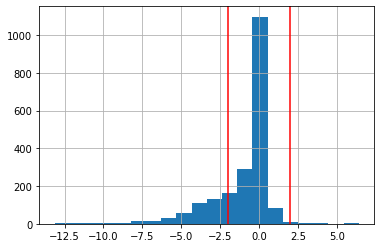

In [9]:
import matplotlib.pyplot as plt

plt.axvline(x=2, color='r')
plt.axvline(x=-2, color='r')

predictions['delta_logit_psi'].hist(bins=20)

For huge vcf files, output is writen to csv file on batch predictions.

In [10]:
dl = SplicingVCFDataloader(gtf, fasta, vcf)
predict_save(model, dl, output_csv='pred.csv', pathogenicity=True, splicing_efficiency=True)

4it [00:11,  2.51s/it]


In [11]:
! head pred.csv

ID,exons,exon_id,gene_id,gene_name,transcript_id,delta_logit_psi,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
17:41197805:ACATCTGCC:['A'],17:41196311-41197819:-,ENSE00001814242,ENSG00000012048,BRCA1,ENST00000357654,0.0018479383059293569,-2.9240594,5.0689387,-4.191132,-3.1975443,0.10508263,-2.9240594,5.0689387,-4.1903567,-3.1975443,0.10508263,0.9086872558907046,-0.11951388100548177
17:41197805:ACATCTGCC:['A'],17:41196312-41197819:-,ENSE00001312675,ENSG00000012048,BRCA1,ENST00000354071,0.0018508901191378701,-2.9240594,5.0689387,-4.190762,-2.977995,0.10508263,-2.9240594,5.0689387,-4.189985,-2.977995,0.10508263,0.8983492946545182,-0.1195065643553132
17:41197805:ACATCTGCC:['A'],17:41196821-41197819:-,ENSE00001831829,ENSG00000012048,BRCA1,ENST00000468300,0.006489664576316575,-2.9240594,5.0689387,-3.8693066,-2.1827195,0.10508263,-2.9240594,5.0689387,-3.865532,-2.1827195,0.10508263

## Exon dataloader

Exon dataloader run mmsplice on specific set of variant-exon pairs provided by csv file which contains columns of ('chrom', 'start', 'end', 'strand', 'pos', 'ref', 'alt')

In [12]:
exons = '../tests/data/test_exons.csv'

`ExonDataset` can be used interchangable with `SplicingVCFDataloader` for functions like `predict_save`, `predict_all_table`

In [13]:
from mmsplice.exon_dataloader import ExonDataset

dl = ExonDataset(exons, fasta)
exon_pred = predict_all_table(model, dl, pathogenicity=True, splicing_efficiency=True)

1it [00:00, 13.29it/s]


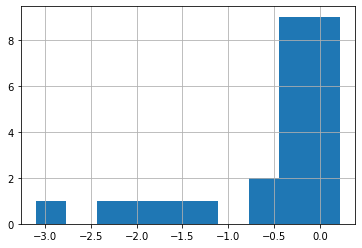

In [14]:
import matplotlib.pyplot as plt

exon_pred['delta_logit_psi'].hist()

In [15]:
dl = ExonDataset(exons, fasta)
predict_save(model, dl, output_csv='pred_exon.csv', pathogenicity=True, splicing_efficiency=True)

1it [00:00, 21.92it/s]


## Tissue-spefic Analysis

In [16]:
dl = SplicingVCFDataloader(gtf, fasta, vcf, tissue_specific=True)
df_tissue = predict_all_table(model, dl)

/home/muhammedhasan/Projects/MMSplice/venv/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
4it [00:13,  2.89s/it]


In [17]:
df_tissue.head()

,ID,exons,exon_id,gene_id,gene_name,transcript_id,delta_logit_psi,ref_acceptorIntron,ref_acceptor,ref_exon,...,Not Sun Exposed - Skin,Sun Exposed (Lower leg) - Skin,Ileum - Small Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,17:41197805:ACATCTGCC:['A'],17:41196311-41197819:-,ENSE00001814242,ENSG00000012048,BRCA1,ENST00000357654,0.001848,-2.924059,5.068939,-4.191132,...,-0.022612,0.004428,0.034280,0.013550,0.030910,0.158520,0.012267,-0.023482,-0.004196,-0.090297
1,17:41197805:ACATCTGCC:['A'],17:41196312-41197819:-,ENSE00001312675,ENSG00000012048,BRCA1,ENST00000354071,0.001851,-2.924059,5.068939,-4.190762,...,-0.019950,0.006607,0.035693,0.014731,0.032347,0.144448,0.012627,-0.022649,-0.002907,-0.088179
2,17:41197805:ACATCTGCC:['A'],17:41196821-41197819:-,ENSE00001831829,ENSG00000012048,BRCA1,ENST00000468300,0.006490,-2.924059,5.068939,-3.869307,...,-0.013288,0.014208,0.040745,0.028313,0.031270,0.444033,0.031151,-0.022492,-0.003075,-0.077472
3,17:41197805:ACATCTGCC:['A'],17:41197579-41197819:-,ENSE00002914501,ENSG00000012048,BRCA1,ENST00000586385,0.044888,-2.924059,5.068939,-3.507481,...,0.028461,0.048559,0.075168,0.058643,0.073155,0.243856,0.066884,0.022500,0.043541,-0.035006
4,17:41197805:ACATCTGCC:['A'],17:41197645-41197819:-,ENSE00001937547,ENSG00000012048,BRCA1,ENST00000493795,0.048545,-2.924059,5.068939,-3.694287,...,0.068183,0.093268,0.090777,0.076176,0.093226,0.268817,0.069880,0.033065,0.057596,-0.032081
